<a href="https://colab.research.google.com/github/akashsahu992906/machine-learning-projects-/blob/main/Santander_edwisor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lifecycle of the project:

1) Data collection(load dataset and basic analysis)

2)Exploratory Data Analysis(skew,kurtosis,correlation,scatterplots,bar graphs)

3)Feature Engineering

4)Feature Selection

5)Model Training(Logistic Regression,NaiveBayes,Xgboost)

6)HyperParameter Tuning

7)Model Deployment

**1) Data Collection**

 *Load dependencies*

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
def ignore_warn(*args,**kwargs):
   pass
warnings.warn=ignore_warn
from scipy.stats import skew,kurtosis

*Load Dataset*

In [ ]:
santander_train=pd.read_csv('/content/drive/MyDrive/santander/train (1).csv')

In [ ]:
santander_train=santander_train.drop("ID_code",axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms=mms.fit_transform(santander_train)
mms_df=pd.DataFrame(mms,columns=santander_train.columns)

In [ ]:
santander_train

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,1

In [ ]:
santander_train.shape

(200000, 201)

In [ ]:
santander_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,...,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,7.567236,0.394340,-3.245596,14.023978,8.530232,7.537606,14.573126,9.333264,-5.696731,15.244013,12.438567,13.290894,17.257883,4.305430,3.019540,10.584400,13.667496,-4.055133,-1.137908,5.532980,5.053874,-7.687740,10.393046,-0.512886,14.774147,11.434250,3.842499,2.187230,5.868899,10.642131,...,24.259300,5.633293,5.362896,11.002170,-2.871906,19.315753,2.963335,-4.151155,4.937124,5.636008,-0.004962,-0.831777,19.817094,-0.677967,20.210677,11.640613,-2.799585,11.882933,-1.014064,2.591444,-2.741666,10.085518,0.719109,8.769088,12.756676,-3.983261,8.970274,-10.335043,15.377174,0.746072,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,1.235070,5.500793,5.970253,0.190059,4.639536,2.247908,0.411711,2.557421,6.712612,7.851370,7.996694,5.876254,8.196564,2.847958,0.526893,3.777245,0.285535,5.922210,1.523714,0.783367,2.615942,7.965198,2.159891,2.587830,4.322325,0.541614,5.179559,3.119978,2.249730,4.278903,...,10.880263,0.217938,1.419612,5.262056,5.457784,5.024182,0.369684,7.798020,3.105986,0.369437,4.424621,5.378008,8.674171,5.966674,7.136427,2.892167,7.513939,2.628895,8.579810,2.798956,5.261243,1.371862,8.963434,4.474924,9.318280,4.725167,3.189759,11.574708,3.944604,0.976348,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,3.970500,-20.731300,-26.095000,13.434600,-6.011100,1.013300,13.076900,0.635100,-33.380200,-10.664200,-12.402500,-5.432200,-10.089000,-5.322500,1.209800,-0.678400,12.720000,-24.243100,-6.166800,2.089600,-4.787200,-34.798400,2.140600,-8.986100,1.508500,9.816900,-16.513600,-8.095100,-1.183400,-6.337100,...,-7.452200,4.852600,0.623100,-6.531700,-19.997700,3.816700,1.851200,-35.969500,-5.250200,4.258800,-14.506000,-22.479300,-11.453300,-22.748700,-2.995300,3.241500,-29.116500,4.952100,-29.273400,-7.856100,-22.037400,5.416500,-26.001100,-4.808200,-18.489700,-22.583300,-3.022300,-47.753600,4.412300,-2.554300,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.26

*Target variable analysis*

In [ ]:
santander_train['target'].describe()

count    200000.000000
mean          0.100490
std           0.300653
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

In [ ]:
# This is an imbalanced dataset with 10.049% 1's and 89.9% 0's
santander_train.target.value_counts()/len(santander_train)

0    0.89951
1    0.10049
Name: target, dtype: float64

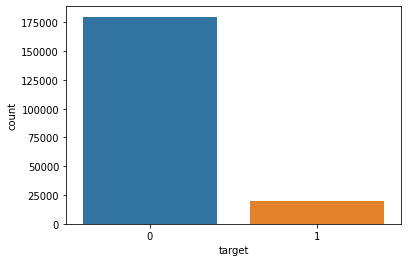

In [ ]:
sns.countplot('target',data=santander_train)

*Target variable*

In [ ]:
y_train=santander_train.pop("target")

**2) Exploratory Data Analysis** (dont use for code only illustration)

 *SKEW Analysis*

In [ ]:
for i in santander_train.columns:
   print("{}:{}".format(i,skew(santander_train[i])))

var_0:0.23563698750480275
var_1:0.053114904345656876
var_2:0.2603115429229766
var_3:-0.003548124402436111
var_4:-0.04820946777992147
var_5:-0.0020375102136673618
var_6:0.14947483168256642
var_7:0.08459700661643049
var_8:-0.10464250626872046
var_9:-0.1754317799399221
var_10:-0.056715264026202424
var_11:0.07054838295037633
var_12:-0.1436627882204675
var_13:-0.17689568928206165
var_14:0.038347020680448374
var_15:0.0355104932876549
var_16:0.19196628396942847
var_17:-0.05367108021750098
var_18:0.08862430142618491
var_19:0.050516136878993714
var_20:0.059917456893489617
var_21:-0.0016748376098416964
var_22:0.15661004334366857
var_23:0.06295138828921723
var_24:0.14221621839099535
var_25:0.1758141241007285
var_26:0.17276859940158149
var_27:0.020910298746888416
var_28:-0.041625925218802824
var_29:0.20036278766869553
var_30:-0.11324584747710319
var_31:0.07474468627678191
var_32:0.003090534604566847
var_33:0.08940510136983161
var_34:-0.02966848155789526
var_35:-0.02130367568379003
var_36:-0.049431

*Highly skewed Features*

In [ ]:
#none of variables are skewed 
skew_var_list=[]
for i in santander_train.columns:
   skew_var=skew(santander_train[i])
   skew_var_list.append(skew_var)
   if skew_var>0.5 or skew_var<-0.5:
      print("{}:{}".format(i,skew_var))

Text(0.5, 0, 'skew')

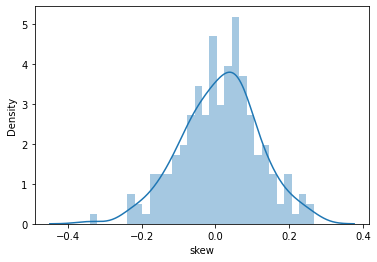

In [ ]:
sns.distplot(skew_var_list,bins=30)
plt.xlabel('skew')

*Correlation Analysis*

In [ ]:
#correlation of all variables with each other 
santander_train.corr()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
var_0,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,-0.002514,0.000718,-0.001647,-0.001589,0.002835,-0.000225,0.003361,0.004286,-0.001448,0.001140,0.001417,-0.003589,0.000295,0.005504,0.000356,-0.007175,0.000374,0.001557,0.003704,-0.002882,-0.005575,-0.000841,-0.000818,-0.000827,0.001919,-0.000987,-0.000284,-0.004843,0.002300,-0.005071,0.000278,0.001133,-0.000220,0.001620,-0.000036,0.003087,-0.002611,-0.000541,0.003813,-0.001015,0.001022,0.001195,-0.002185,-0.000384,-0.000527,0.004329,-0.004794,-0.002046,-0.004159,0.005662,0.001961,0.001128,-0.001759,0.000722,0.000657,-0.004283,-0.000669,0.001828,-0.002476,0.000251,-0.003118,-0.000987,-0.007402,-0.001754,0.000896,-0.004338,-0.004164,-0.001196,-0.001827,0.000864,-0.002961,0.002217,0.002628,0.002141,0.004496,0.001554,-0.001635,-0.001303,-0.006375,0.002477,-0.002321,-0.003682,0.002822,0.006261,0.002669,0.001057,0.001878,-0.001843,-0.005004,-0.000163,0.000953,-0.000925,0.000189,-0.003217,0.002413,-0.002712,0.002304,-0.001100,0.000189,-0.002975,-0.004248,0.000719,0.000320,-0.000132,-0.002302,-0.007269,0.002156,0.001848,-0.004478,0.002574,0.001678,-0.005587,0.002499,-0.000683,-0.000546,0.001197,0.000953,0.001165,0.003447,0.001939,0.001952,-0.001957,-0.001721,-0.000554,0.001868,0.001267,0.001413,0.001770,0.000543,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,-0.000832,0.002875,0.004778,-0.001977,-0.001303,-0.001544,0.004946,-0.002481,-0.001180,0.000289,0.001246,-0.002255,-0.001519,0.001762,0.003606,0.001417,0.000844,0.004778,-0.004551,-0.002463,0.006328,-0.002244,-0.002811,0.002713,0.001072,-0.002965,0.004293,-0.004466,-0.000122,0.001545,-0.000754,0.001830,0.001240,0.002492,-0.002299,-0.006390,-0.003510,-0.002197,0.004786,0.000111,0.003956,0.000057,0.004052,0.001637,0.005195,-0.004447,0.000314,0.000318,0.002675,-0.003877,0.000610,0.000567,0.000891,0.000417,0.003081,-0

In [ ]:
#correlation with the first  variable
corr_list=[]
for i in santander_train.columns:
         corr=santander_train['var_0'].corr(santander_train[i])
         corr_list.append(corr)
         print("{}:{}".format(i,corr))

var_0:1.0
var_1:-0.0005436992424820587
var_2:0.006572833797730052
var_3:0.003800760524091253
var_4:0.0013258094155349563
var_5:0.00304624721033911
var_6:0.006982548837449106
var_7:0.0024290136473743506
var_8:0.00496243103487931
var_9:-0.002612650154839348
var_10:0.00035470144960559057
var_11:0.0034677075164386024
var_12:-0.0019957312513157292
var_13:-0.0027168695400550677
var_14:-0.004584453435126312
var_15:-4.2650719049552396e-05
var_16:0.0011116822083758694
var_17:-0.001663664539076349
var_18:0.004292273655884835
var_19:0.0015051734411530065
var_20:-0.0009318282674103541
var_21:0.0007808872103170017
var_22:0.002321929218141027
var_23:-0.0009874768121640647
var_24:0.003658088871850034
var_25:0.0011577464647435204
var_26:0.006117345681916162
var_27:0.0009846973710313154
var_28:0.0010814412815058918
var_29:-0.0004256135614609233
var_30:0.0031874514348294073
var_31:-0.0020968329819679326
var_32:0.0002739494662257964
var_33:-0.0033429350832035005
var_34:-0.003932963506451788
var_35:0.0014

Text(0.5, 0, 'correlation with var_0 of other variables')

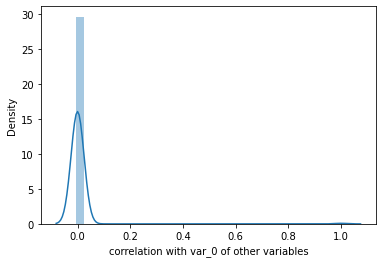

In [ ]:
sns.distplot(corr_list,bins=30)
plt.xlabel('correlation with var_0 of other variables')

*kurtosis to measure peakedness*

In [ ]:
kurtosis_list=[]
for i in santander_train:
      kurt=kurtosis(santander_train[i],fisher=False)
      kurtosis_list.append(kurt)
      print("{}:{}".format(i,kurt))

var_0:2.726384301131067
var_1:2.3927204327861555
var_2:2.663362403682394
var_3:2.39736175954667
var_4:2.4649905526636537
var_5:2.331033052103434
var_6:2.615982415960592
var_7:2.328972549893349
var_8:2.196391124000408
var_9:2.23922515611421
var_10:2.5073818822845184
var_11:2.6909711538643437
var_12:2.6537614400506055
var_13:2.346147505481435
var_14:2.238711654354066
var_15:2.433618013595599
var_16:2.671088416428637
var_17:2.5563849080087016
var_18:2.4009359577699714
var_19:2.3580670319786563
var_20:2.188188441206253
var_21:2.6492312968916623
var_22:2.656197102379443
var_23:2.4897158450343464
var_24:2.260255099727214
var_25:2.6756902748312026
var_26:2.7499910787643356
var_27:2.3285767125941197
var_28:2.633387813735453
var_29:2.758752400936137
var_30:2.2514725845346537
var_31:2.73872193657858
var_32:2.2863715514334095
var_33:2.313947715957707
var_34:2.39942720803464
var_35:2.580906578801281
var_36:2.579801304492183
var_37:2.3859644777593054
var_38:2.678698648836193
var_39:2.56572771932391

Text(0.5, 0, 'kurtosis')

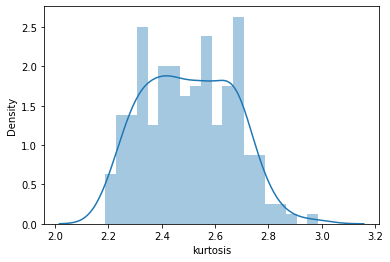

In [ ]:
sns.distplot(kurtosis_list,bins=20) 
plt.xlabel("kurtosis")

*Uniqueness of features in each column*

In [ ]:
unique_list=[]
for i in santander_train:
   unique=len(santander_train[i].unique())/len(santander_train)
   unique_list.append(unique)
   print("{}:{}".format(i,unique))

var_0:0.47336
var_1:0.54466
var_2:0.432775
var_3:0.372985
var_4:0.317575
var_5:0.705145
var_6:0.192995
var_7:0.515315
var_8:0.493085
var_9:0.247085
var_10:0.64382
var_11:0.650965
var_12:0.047805
var_13:0.575905
var_14:0.39561
var_15:0.09905
var_16:0.43459
var_17:0.689115
var_18:0.697575
var_19:0.7209
var_20:0.63882
var_21:0.70031
var_22:0.4533
var_23:0.124565
var_24:0.525505
var_25:0.074265
var_26:0.635445
var_27:0.300925
var_28:0.179295
var_29:0.441695
var_30:0.729885
var_31:0.38694
var_32:0.42982
var_33:0.561195
var_34:0.12582
var_35:0.61192
var_36:0.48202
var_37:0.3952
var_38:0.57683
var_39:0.56337
var_40:0.70939
var_41:0.65948
var_42:0.15796
var_43:0.07594
var_44:0.63851
var_45:0.84984
var_46:0.46725
var_47:0.773905
var_48:0.760195
var_49:0.703205
var_50:0.16154
var_51:0.717275
var_52:0.606565
var_53:0.1673
var_54:0.72388
var_55:0.640385
var_56:0.515225
var_57:0.177725
var_58:0.569535
var_59:0.18872
var_60:0.568815
var_61:0.796845
var_62:0.373885
var_63:0.48549
var_64:0.296895
var_

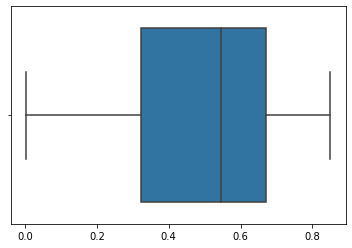

In [ ]:
sns.boxplot(unique_list)

*Mean of all variables(histplot)*

Text(0.5, 1.0, 'mean of all 200 distributions')

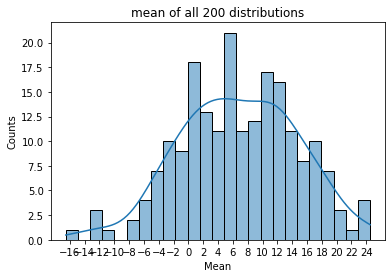

In [ ]:
sns.histplot(santander_train.loc[:,'var_0':'var_199'].mean(axis=0),bins=25,kde=True)
plt.xlabel("Mean")
plt.ylabel("Counts")
plt.xticks(np.arange(-16,26,2))
plt.title("mean of all 200 distributions")

*Standard deviation of variables*

Text(0.5, 1.0, 'standard deviation of all 200 distributions')

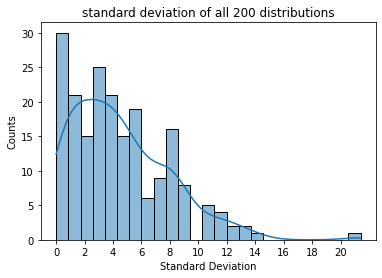

In [ ]:
sns.histplot(santander_train.loc[:,'var_0':'var_199'].std(axis=0),bins=25,kde=True)
plt.xlabel("Standard Deviation")
plt.ylabel("Counts")
plt.xticks(np.arange(0,22,2))
plt.title("standard deviation of all 200 distributions")

*Variance of all variables*

Text(0.5, 1.0, 'Variance of all 200 distributions')

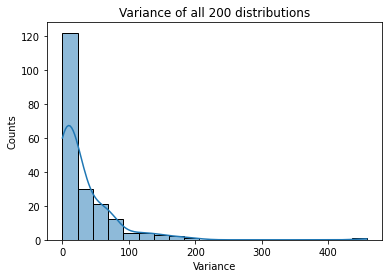

In [ ]:
sns.histplot(santander_train.loc[:,'var_0':'var_199'].var(axis=0),bins=20,kde=True)
plt.xlabel("Variance")
plt.ylabel("Counts")

plt.title("Variance of all 200 distributions")

*Covariance Analysis*

In [ ]:
covariance_var_list=[]
for i in santander_train:
    covariance_var=np.cov(santander_train[i])
    covariance_var_list.append(covariance_var)
    print("{}:{}".format(i,covariance_var))

var_0:9.241909296254263
var_1:16.402857940588223
var_2:6.974322132282452
var_3:4.175152602617283
var_4:2.634614409519367
var_5:61.83096293547497
var_6:0.7510081538599307
var_7:11.683240663326508
var_8:11.106446290054725
var_9:1.5253977203803928
var_10:30.258723707971377
var_11:35.643922024391586
var_12:0.03612251207720375
var_13:21.525289674385174
var_14:5.053091478198169
var_15:0.16950629489308627
var_16:6.5404021388449465
var_17:45.059165737617754
var_18:61.64401466587764
var_19:63.9471118647415
var_20:34.53035996360696
var_21:67.18365560330285
var_22:8.110864427020738
var_23:0.2776167112550928
var_24:14.267581524106063
var_25:0.08153049999252399
var_26:35.07256869239621
var_27:2.3217050416253704
var_28:0.613664291894683
var_29:6.843149984916998
var_30:63.44438276774042
var_31:4.665127421719663
var_32:6.696861749472215
var_33:18.682491551392072
var_34:0.2933459379035043
var_35:26.827831424098214
var_36:9.734261692885541
var_37:5.061284521485548
var_38:18.309009471592265
var_39:16.555

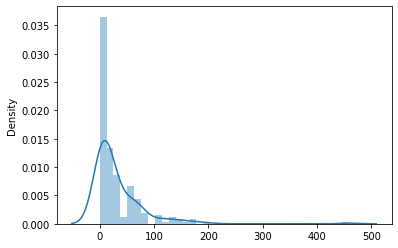

In [ ]:
sns.distplot(covariance_var_list)

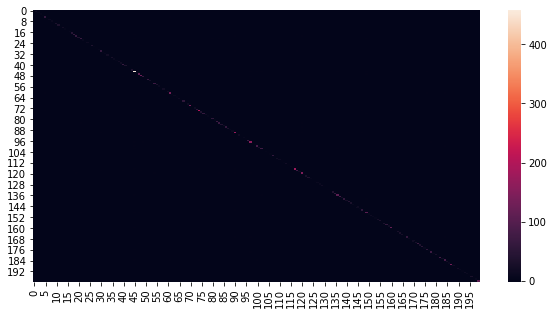

In [ ]:
cov_mat=np.cov(santander_train.loc[:,'var_0':'var_199'],rowvar=False) 
plt.figure(figsize=(10,5))
sns.heatmap(cov_mat)

**3) Feature Engineering**

*Missing value analysis* (dont use for code)

In [ ]:
missing_df=pd.DataFrame({'columns':santander_train.columns,'missing_Values':[sum(santander_train[y].isnull()) for y in santander_train.columns],'missing_ratio':[sum(santander_train[y].isnull())/santander_train.shape[0] for y in santander_train.columns]})

In [ ]:
#there are no missing values 
missing_df


,columns,missing_Values,missing_ratio
0,target,0,0.0
1,var_0,0,0.0
2,var_1,0,0.0
3,var_2,0,0.0
4,var_3,0,0.0
...,...,...,...
196,var_195,0,0.0
197,var_196,0,0.0
198,var_197,0,0.0
199,var_198,0,0.0


*Standard Scaler* (dont use for code)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scalerstd=sc.fit_transform(santander_train)

*Non use of PCA* (dont use for code)

Text(0, 0.5, 'Cumulative explained variance')

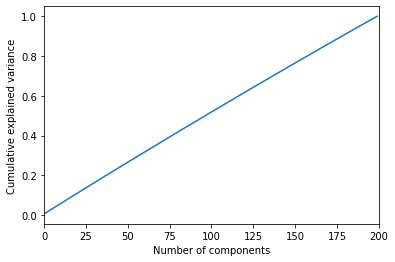

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(scalerstd)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,200,20)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.00611308, 0.01141575, 0.01671437, 0.0220111 , 0.02729904,
       0.03258173, 0.03786121, 0.04313547, 0.04840113, 0.05366396,
       0.05891951, 0.06416945, 0.06941547, 0.07465234, 0.07988816,
       0.08512319, 0.09035047, 0.09557429, 0.10079355, 0.10601182,
       0.11122678, 0.11643696, 0.12164425, 0.12684667, 0.13204642,
       0.13724092, 0.14243391, 0.14762647, 0.15281394, 0.15799742,
       0.16318031, 0.16835862, 0.17353256, 0.17870177, 0.1838681 ,
       0.18903407, 0.19419649, 0.19935625, 0.20451094, 0.20966429,
       0.21481378, 0.21995876, 0.22510134, 0.23024245, 0.23537949,
       0.24051395, 0.24564578, 0.2507748 , 0.25590265, 0.26102778,
       0.26614685, 0.2712646 , 0.27638097, 0.281496  , 0.28660541,
       0.29171172, 0.2968176 , 0.30192076, 0.30702207, 0.31212029,
       0.31721562, 0.32230831, 0.32739942, 0.33248742, 0.33757137,
       0.34265187, 0.34773107, 0.35280684, 0.35787887, 0.36294776,
       0.36801567, 0.37307911, 0.37814133, 0.38320049, 0.38825

*Min-Max Scaler*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
scaler=min_max.fit_transform(santander_train)
santander_train=pd.DataFrame(scaler,columns=santander_train.columns)

*SMOTE*

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#pipeline 
over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)     

In [ ]:
X_train_new,Y_train_new=pipeline.fit_resample(santander_train,y_train)

In [ ]:
X_train_new_df=pd.DataFrame(X_train_new,columns=santander_train.columns)

In [ ]:
santander_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0000

**4) Feature Selection**

*Mutual Information*

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_new, Y_train_new)
mutual_info

array([4.51226383e-03, 4.42122287e-03, 3.72501442e-03, 2.90874984e-03,
       1.42814549e-03, 4.42141012e-03, 2.08193059e-02, 2.38929925e-03,
       2.14206839e-03, 8.56060108e-03, 1.88617319e-03, 3.67128111e-04,
       7.42251379e-02, 6.65369870e-03, 1.96945612e-03, 6.28179859e-02,
       1.83972604e-03, 2.53098439e-03, 3.15353593e-03, 3.40990474e-03,
       4.90950804e-03, 4.36645093e-03, 3.79479571e-03, 4.75118512e-02,
       3.54211352e-03, 6.97716155e-02, 7.44248995e-03, 1.92141227e-03,
       2.17466453e-02, 2.48661919e-03, 1.61527664e-03, 2.48986220e-03,
       4.03079915e-03, 3.47052955e-03, 4.67609817e-02, 2.14031701e-03,
       1.44666878e-03, 3.51784394e-03, 1.10611606e-03, 7.36527041e-04,
       3.37340906e-03, 2.42842618e-03, 3.02951890e-02, 6.90933728e-02,
       3.14638959e-03, 3.05157960e-03, 1.94208347e-03, 1.53577431e-03,
       2.87077516e-03, 2.55283714e-03, 2.93452464e-02, 4.70845293e-03,
       2.38935076e-03, 2.62948522e-02, 4.00520115e-03, 2.35450755e-03,
      

In [ ]:
mutual_info = pd.DataFrame(mutual_info,index=santander_train.columns)

mutual_info['mutual_info_score']=mutual_info[0]
mutual_info=mutual_info.drop(0,axis=1)

In [ ]:
mutual_info

,mutual_info_score
var_0,0.004512
var_1,0.004421
var_2,0.003725
var_3,0.002909
var_4,0.001428
...,...
var_195,0.002691
var_196,0.001573
var_197,0.014265
var_198,0.004498


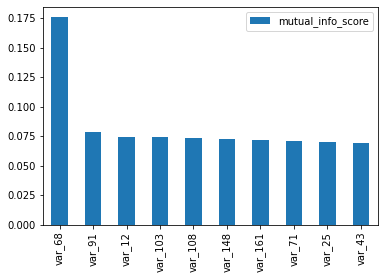

In [ ]:

mutual_info.sort_values("mutual_info_score",ascending=False).head(10).plot(kind="bar")

In [ ]:
np.mean(mutual_info['mutual_info_score'])

0.011204596469184654

In [ ]:
np.std(mutual_info['mutual_info_score'])

0.02187191260852848

In [ ]:
mutual_info_nil=mutual_info[mutual_info['mutual_info_score']<(0.004)]

In [ ]:
cols=[cols for cols in mutual_info_nil.index]
X_train_new_df=X_train_new_df.drop(cols,axis=1)

In [ ]:
X_train_new_df

,var_0,var_1,var_2,var_5,var_6,var_9,var_12,var_13,var_15,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_28,var_32,var_33,var_34,var_37,var_40,var_42,var_43,var_44,var_45,var_50,var_51,var_53,var_54,var_57,var_59,var_62,var_63,var_66,var_68,var_71,var_74,var_76,var_78,var_80,var_81,var_82,var_87,var_88,var_90,var_91,var_92,var_93,var_94,var_95,var_98,var_99,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_114,var_115,var_116,var_117,var_118,var_119,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_130,var_131,var_132,var_133,var_137,var_139,var_141,var_144,var_146,var_147,var_148,var_149,var_154,var_156,var_161,var_163,var_164,var_165,var_166,var_167,var_169,var_170,var_172,var_173,var_174,var_177,var_179,var_181,var_184,var_186,var_188,var_189,var_190,var_192,var_197,var_198,var_199
0,0.391538,0.544598,0.455793,0.465797,0.537686,0.359508,0.501025,0.668658,0.678582,0.499202,0.544578,0.344808,0.711631,0.429462,0.349321,0.735653,0.549778,0.519685,0.490340,0.396508,0.712505,0.503270,0.522028,0.534476,0.462868,0.234170,0.385332,0.332893,0.624714,0.452113,0.506160,0.662125,0.458346,0.263791,0.283778,0.598629,0.371687,0.589454,0.415335,0.527750,0.390053,0.796621,0.169750,0.533086,0.401512,0.608153,0.515116,0.323559,0.579518,0.662794,0.574047,0.218272,0.663960,0.509547,0.556073,0.197867,0.434554,0.355816,0.679889,0.697267,0.389941,0.274259,0.308598,0.303024,0.707262,0.361842,0.436312,0.603676,0.381130,0.470400,0.556987,0.603952,0.653270,0.719458,0.526747,0.530141,0.328761,0.184924,0.752087,0.596708,0.370674,0.702590,0.721934,0.541521,0.665842,0.451412,0.439208,0.540141,0.180898,0.560172,0.349854,0.748081,0.385027,0.310668,0.621705,0.256751,0.413684,0.682274,0.561374,0.468050,0.477646,0.589437,0.550712,0.324749,0.596462,0.524060,0.319941,0.609002,0.290557,0.473696,0.365440,0.566273,0.531938,0.647135,0.706896
1,0.463896,0.701568,0.577516,0.384716,0.586945,0.704210,0.527830,0.306965,0.392262,0.701344,0.921321,0.378236,0.352898,0.672466,0.421755,0.300524,0.441900,0.387693,0.511272,0.549571,0.266637,0.580022,0.630074,0.465654,0.399579,0.426056,0.476909,0.353388,0.445283,0.440113,0.851942,0.531996,0.595950,0.561084,0.253265,0.615154,0.261950,0.442561,0.843421,0.462081,0.489102,0.449047,0.488208,0.449951,0.373205,0.473165,0.338440,0.331778,0.634081,0.557337,0.133723,0.335888,0.386507,0.643068,0.463980,0.396726,0.413785,0.404763,0.556352,0.211089,0.452761,0.348699,0.435782,0.420839,0.673511,0.588124,0.248429,0.544405,0.780186,0.643461,0.511042,0.571168,0.391770,0.364435,0.742213,0.438134,0.334384,0.457485,0.112997,0.460456,0.266193,0.242288,0.521459,0.476391,0.547181,0.641475,0.575355,0.532311,0.306151,0.374914,0.620890,0.505207,0.333905,0.468585,0.789501,0.445469,0.141314,0.611140,0.386863,0.287177,0.385254,0.683466,0.370164,0.766229,0.396568,0.259619,0.416547,0.620031,0.363597,0.285350,0.583930,0.641890,0.441521,0.476233,0.698466
2,0.356997,0.757917,0.524417,0.311628,0.616910,0.174051,0.627019,0.374899,0.528639,0.442998,0.233384,0.425052,0.466967,0.591515,0.553473,0.364644,0.346687,0.247709,0.594703,0.498808,0.490283,0.399205,0.287863,0.681021,0.259012,0.310581,0.343103,0.406223,0.545208,0.346456,0.686367,0.640315,0.618770,0.728195,0.578399,0.685510,0.620720,0.389831,0.693747,0.677821,0.415420,0.414268,0.401236,0.637422,0.728966,0.398569,0.374618,0.589447,0.675209,0.619258,0.684246,0.331270,0.640945,0.481053,0.626511,0.491153,0.588846,0.398271,0.285298,0.175818,0.459467,0.298889,0.626821,0.487260,0.562164,0.300219,0.400930,0.314099,0.502851,0.672827,0.500736,0.379179,0.415709,0.595428,0.755145,0.260319,0.660863,0.834070,0.515198,0.413301,0.290559,0.457285,0.921138,0.444624,0.179282,0.607716,0.708479,0.675356,0.336801,0.447605,0.679463,0.347989,0.374117,0.646418,0.441919,0.253362,0.328550,0.709240,0.402198,0.527961,0.384453,0.686077,0.602654,0.348904,0.602137,0.492670,0.372427,0.308931,0.372963,0.642812,0.397837,0.351767,0.407646,0.649177,0.556486
3,0.520275,0.530676,0.200715,

*Lasso Regression to remove unwanted features*

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
reg=LassoCV(random_state=100)
reg.fit(X_train_new_df,Y_train_new)



LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=100, selection='cyclic',
        tol=0.0001, verbose=False)

In [ ]:
coef = pd.DataFrame(reg.coef_, index = santander_train.columns)
coef['columns']=coef.index
coef['score']=coef[0]
coef=coef.drop(0,axis=1)

In [ ]:
coef.reset_index(drop=True)

,columns,score
0,var_0,0.157479
1,var_1,0.153031
2,var_2,0.173342
3,var_3,0.041560
4,var_4,0.051074
...,...,...
195,var_195,0.094063
196,var_196,0.070379
197,var_197,-0.119709
198,var_198,-0.165054


In [ ]:
drop_features=coef[coef['score']<-0.0005]

In [ ]:
drop_columns=drop_features.index
X_train_new_df=X_train_new_df.drop(drop_columns,axis=1)

In [ ]:
X_train_new_df

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_8,var_11,var_15,var_16,var_18,var_19,var_22,var_24,var_25,var_26,var_29,var_30,var_32,var_35,var_37,var_40,var_46,var_47,var_48,var_49,var_51,var_52,var_53,var_55,var_60,var_61,var_62,var_65,var_66,var_67,var_69,var_70,var_71,var_74,var_78,var_79,var_82,var_84,var_89,var_90,var_91,var_94,var_95,var_96,var_97,var_99,var_105,var_106,var_110,var_111,var_112,var_117,var_118,var_119,var_124,var_125,var_126,var_128,var_130,var_133,var_134,var_135,var_137,var_138,var_140,var_144,var_145,var_147,var_151,var_155,var_157,var_159,var_161,var_162,var_163,var_164,var_167,var_168,var_170,var_171,var_173,var_175,var_176,var_179,var_180,var_181,var_184,var_187,var_189,var_190,var_191,var_195,var_196,var_199
0,0.362357,0.555590,0.390638,0.716778,0.574392,0.760125,0.314389,0.457152,0.356933,0.697459,0.309503,0.242140,0.449196,0.272185,0.360158,0.524915,0.517225,0.664272,0.783007,0.558251,0.293164,0.652684,0.574395,0.564530,0.547820,0.705069,0.436487,0.701706,0.589351,0.505976,0.354084,0.607394,0.369880,0.609622,0.454801,0.581956,0.500769,0.229463,0.619430,0.562949,0.525511,0.303030,0.695561,0.617369,0.637281,0.552984,0.366840,0.740622,0.696373,0.447550,0.466543,0.308024,0.426795,0.500364,0.742499,0.390409,0.359637,0.668980,0.397561,0.731281,0.415722,0.476396,0.654469,0.707167,0.223552,0.338186,0.442166,0.511474,0.448001,0.236794,0.401796,0.600431,0.855462,0.451715,0.647052,0.216885,0.620053,0.600375,0.520436,0.682495,0.806556,0.452492,0.463916,0.580883,0.515437,0.231104,0.437977,0.613303,0.201416,0.533926,0.391700,0.237186,0.464088,0.826919,0.706126,0.747055,0.538649,0.478473,0.627812,0.342734,0.317339
1,0.401560,0.576243,0.360892,0.716944,0.339539,0.472915,0.485263,0.626757,0.380677,0.328201,0.611955,0.355377,0.876841,0.325742,0.666584,0.262483,0.380694,0.615494,0.356964,0.426996,0.497772,0.330032,0.423862,0.335738,0.407358,0.754031,0.210118,0.622917,0.489435,0.635247,0.373716,0.276736,0.361888,0.437493,0.469811,0.298493,0.431392,0.638242,0.717079,0.277354,0.616761,0.505855,0.549112,0.496980,0.404116,0.743476,0.808740,0.306500,0.634606,0.547163,0.711480,0.308869,0.858445,0.642883,0.801114,0.569427,0.705548,0.422524,0.454799,0.478059,0.542154,0.787293,0.598871,0.063432,0.300517,0.225189,0.565835,0.672856,0.622861,0.216371,0.260194,0.584756,0.585535,0.391340,0.394783,0.564445,0.621829,0.583508,0.248753,0.556028,0.398978,0.378514,0.487200,0.517202,0.839623,0.608991,0.701821,0.817996,0.500724,0.784063,0.347485,0.393628,0.443235,0.663487,0.618333,0.325375,0.568749,0.363063,0.655482,0.741850,0.349847
2,0.243633,0.611710,0.379470,0.681287,0.377688,0.876818,0.440824,0.409734,0.505567,0.710917,0.553475,0.779687,0.602444,0.406919,0.448902,0.233278,0.585272,0.566064,0.499266,0.546478,0.618235,0.587321,0.455205,0.544492,0.207983,0.515606,0.701532,0.630537,0.556270,0.392993,0.150684,0.634435,0.380192,0.442230,0.453795,0.378146,0.590951,0.531153,0.657946,0.552870,0.354107,0.719356,0.602285,0.656772,0.640661,0.883893,0.445258,0.572285,0.627389,0.560145,0.664006,0.913321,0.534766,0.644432,0.673366,0.314666,0.260334,0.613455,0.241781,0.475920,0.346935,0.600958,0.170653,0.310480,0.390146,0.772468,0.369686,0.407121,0.225495,0.385376,0.593886,0.620373,0.287254,0.372396,0.604653,0.763313,0.300516,0.615142,0.493818,0.203527,0.262814,0.708023,0.403238,0.819670,0.448459,0.537562,0.531540,0.462277,0.492616,0.353726,0.344753,0.456811,0.403257,0.645036,0.503277,0.443461,0.453686,0.369983,0.722590,0.733360,0.666669
3,0.418072,0.540956,0.470472,0.652621,0.435516,0.287727,0.429119,0.655426,0.426634,0.463537,0.510514,0.441748,0.353000,0.585891,0.340643,0.658534,0.666678,0.709034,0.513488,0.734366,0.757760,0.542078,0.361898,0.658831,0.433098,0.452476,0.256348,0.598223,0.644844,0.430586,0.583783,0.455332,0.727223,0.475640,0.477098,0.801000,0.622871,0.727639,0.591420,0.437218,0.546331,0.469846,0.748233,0.675526,0.553617,0.434306,0.634949,0.429679,0.574845,0.477623,0.205637,0.218690,0.499369,0.234602,0.399735,0.494098,0.532619,0.76

**5) Model Creation**

*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_new,Y_train_new)
lr.score(X_train_new,Y_train_new)

0.8078098943857699

*Train Test split*

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(X_train_new,Y_train_new,test_size=0.2,stratify=Y_train_new,shuffle=True,random_state=100)
lr.fit(x_train,y_train2)
lr.score(x_train,y_train2),lr.score(x_test,y_test)

(0.8087826570316843, 0.8027144710024088)

In [ ]:
y_pred=lr.predict(x_test)

*Stratified k-fold cross validation*

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
cv_score=cross_val_score(lr,X_train_new,Y_train_new,cv=kfold,scoring='accuracy',n_jobs=-1)
cv_score.mean(),cv_score.std()

(0.8064943487122476, 0.002500634669445359)

*Precision, Recall, f1-score, roc-auc score,confusion matrix*

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
roc_auc_score=roc_auc_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Precision of Logistic Regression model is:{}%".format(precision*100))
print("Recall of Logistic Regression model is:{}%".format(recall*100))
print("F1-score of Logistic Regression model is:{}%".format(f1_score*100))
print("Roc AUC score of Logistic Regression model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of Logistic Regression model is:73.73525133344108%
Recall of Logistic Regression model is:63.396331295163975%
F1-score of Logistic Regression model is:68.17604423522377%
Roc AUC score of Logistic Regression model is:0.7605266814897165
[[12767  1625]
 [ 2634  4562]]


*Multinomial Naive Bayes*

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_new,Y_train_new)
mnb.score(X_train_new,Y_train_new)

0.6666666666666666

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(X_train_new,Y_train_new,test_size=0.2,stratify=Y_train_new,shuffle=True,random_state=100)
mnb.fit(x_train,y_train2)
mnb.score(x_train,y_train2), mnb.score(x_test,y_test)

(0.6666666666666666, 0.6666666666666666)

In [ ]:
y_pred=mnb.predict(x_test)

*Stratified kfold cross validation*

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
cv_score=cross_val_score(mnb,X_train_new,Y_train_new,cv=kfold,scoring='accuracy',n_jobs=-1)
cv_score.mean(),cv_score.std()

(0.6666666666666666, 0.0)

*Precision, Recall, f1-score, roc-auc score,confusion matrix*

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
roc_auc_score=roc_auc_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Precision of Naive Bayes model is:{}%".format(precision*100))
print("Recall of Naive Bayes model is:{}%".format(recall*100))
print("F1-score of Naive Bayes model is:{}%".format(f1_score*100))
print("Roc AUC score of Naive Bayes model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of Naive Bayes model is:0.0%
Recall of Naive Bayes model is:0.0%
F1-score of Naive Bayes model is:0.0%
Roc AUC score of Naive Bayes model is:0.5
[[14392     0]
 [ 7196     0]]


*Gaussian Naive Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train_new,Y_train_new)
gnb.score(X_train_new,Y_train_new)

0.826107096535112

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(X_train_new,Y_train_new,test_size=0.2,stratify=Y_train_new,shuffle=True,random_state=100)
gnb.fit(x_train,y_train2)
gnb.score(x_train,y_train2),gnb.score(x_test,y_test)

(0.8274041133963312, 0.822355012043728)

In [ ]:
y_pred=gnb.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
roc_auc_score=roc_auc_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Precision of Gaussian Naive Bayes model is:{}%".format(precision*100))
print("Recall of Gaussian Naive Bayes model is:{}%".format(recall*100))
print("F1-score of Gaussian Naive Bayes model is:{}%".format(f1_score*100))
print("Roc AUC score of Gaussian Naive Bayes model is:{}".format(roc_auc_score))


Precision of Gaussian Naive Bayes model is:78.08988764044943%
Recall of Gaussian Naive Bayes model is:65.67537520844914%
F1-score of Gaussian Naive Bayes model is:71.34661835748793%
Roc AUC score of Gaussian Naive Bayes model is:0.7823096164535853


*Light GBM*

In [ ]:
import lightgbm
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(X_train_new,Y_train_new,test_size=0.2,stratify=Y_train_new,shuffle=True,random_state=100)
lgbm.fit(x_train,y_train2)
lgbm.score(x_test,y_test)

0.8027607930331666

In [ ]:
y_pred=lgbm.predict(x_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
cv_score=cross_val_score(lgbm,X_train_new,Y_train_new,cv=kfold,scoring='accuracy',n_jobs=-1)
cv_score.mean(),cv_score.std()

(0.8055586436909394, 0.0017893979242621229)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
roc_auc_score=roc_auc_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Precision of lgbm Classification model is:{}%".format(precision*100))
print("Recall of lgbm Classification model is:{}%".format(recall*100))
print("F1-score of lgbm Classification model is:{}%".format(f1_score*100))
print("Roc AUC score of lgbm Classification model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of lgbm Classification model is:85.51479289940829%
Recall of lgbm Classification model is:50.20844913841023%
F1-score of lgbm Classification model is:63.269415988092106%
Roc AUC score of lgbm Classification model is:0.729780433574208
[[13780   612]
 [ 3583  3613]]


*Xgboost*

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()


In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train2,y_test=train_test_split(X_train_new,Y_train_new,test_size=0.2,stratify=Y_train_new,shuffle=True,random_state=100)
xgb.fit(x_train,y_train2)
xgb.score(x_test,y_test)

0.7364739670187141

In [ ]:
y_pred=xgb.predict(x_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=100)
cv_score=cross_val_score(xgb,X_train_new,Y_train_new,cv=kfold,scoring='accuracy',n_jobs=-1)
cv_score.mean(),cv_score.std()

(0.7374559940707801, 0.0023237598050268042)

*Precision, Recall, f1-score, roc-auc score,confusion matrix*

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
roc_auc_score=roc_auc_score(y_test,y_pred)
confusion_matrix=confusion_matrix(y_test,y_pred)
print("Precision of xgboost Regression model is:{}%".format(precision*100))
print("Recall of xgboost Regression model is:{}%".format(recall*100))
print("F1-score of xgboost Regression model is:{}%".format(f1_score*100))
print("Roc AUC score of xgboost Regression model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of xgboost Regression model is:86.14738805970148%
Recall of xgboost Regression model is:25.667037242912727%
F1-score of xgboost Regression model is:39.55032119914346%
Roc AUC score of xgboost Regression model is:0.6180169538632573
[[14095   297]
 [ 5349  1847]]


**6)Hyperparameter Tuning**

*Logistic Regression*

In [ ]:
c=[10, 1.0, 0.1, 0.01]
penalty=['l2']

grid={
    'C':c,
    'penalty':penalty} 


from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=lr,param_distributions=grid,cv=5,n_iter=50,verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv.fit(x_train,y_train2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=10, score=(train=0.807, test=0.810), total=   2.9s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ............ C=10, score=(train=0.809, test=0.805), total=   3.1s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.0s remaining:    0.0s


[CV] ............ C=10, score=(train=0.809, test=0.810), total=   3.2s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.3s remaining:    0.0s


[CV] ............ C=10, score=(train=0.810, test=0.805), total=   3.2s
[CV] C=10 ............................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   12.5s remaining:    0.0s


[CV] ............ C=10, score=(train=0.809, test=0.806), total=   3.2s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.807, test=0.810), total=   2.7s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.809, test=0.805), total=   2.4s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.809, test=0.810), total=   2.0s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.810, test=0.804), total=   2.6s
[CV] C=1.0 ...........................................................
[CV] ........... C=1.0, score=(train=0.809, test=0.806), total=   2.6s
[CV] C=0.1 ...........................................................
[CV] ........... C=0.1, score=(train=0.807, test=0.811), total=   3.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   53.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'C': [10, 1.0, 0.1, 0.01]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=True, scoring=None, verbose=5)

In [ ]:
lr_best=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False)
                

In [ ]:
lr_best.fit(x_train,y_train2)
lr_best.score(x_train,y_train2), lr_best.score(x_test,y_test) 

(0.8087826570316843, 0.8027144710024088)

In [ ]:
y_pred_best=lr_best.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred_best)
recall=recall_score(y_test,y_pred_best)
f1_score=f1_score(y_test,y_pred_best)
roc_auc_score=roc_auc_score(y_test,y_pred_best)
confusion_matrix=confusion_matrix(y_test,y_pred_best)
print("Precision of logistic regression best model is:{}%".format(precision*100))
print("Recall of logistic regression best model is:{}%".format(recall*100))
print("F1-score of logistic regression best model is:{}%".format(f1_score*100))
print("Roc AUC score of logistic regression best model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of logistic regression best model is:73.6850571014959%
Recall of logistic regression best model is:63.6603668704836%
F1-score of logistic regression best model is:68.30686647282488%
Roc AUC score of logistic regression best model is:0.7614647026125625
[[12756  1636]
 [ 2615  4581]]


*L1 penalty*

In [ ]:
lr_l1=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l1', random_state=None,
                                                solver='saga', tol=0.0001,
                                                verbose=0, warm_start=False)

In [ ]:
lr_l1.fit(x_train,y_train2)
lr_l1.score(x_train,y_train2), lr_l1.score(x_test,y_test) 

(0.8088984621085789, 0.8026218269408931)

In [ ]:
y_pred_best=lr_l1.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred_best)
recall=recall_score(y_test,y_pred_best)
f1_score=f1_score(y_test,y_pred_best)
roc_auc_score=roc_auc_score(y_test,y_pred_best)
confusion_matrix=confusion_matrix(y_test,y_pred_best)
print("Precision of logistic regression l1 model is:{}%".format(precision*100))
print("Recall of logistic regression l1 model is:{}%".format(recall*100))
print("F1-score of logistic regression l1 model is:{}%".format(f1_score*100))
print("Roc AUC score of logistic regression l1  model is:{}".format(roc_auc_score))

Precision of logistic regression l1 model is:73.68928916050177%
Recall of logistic regression l1 model is:63.674263479710945%
F1-score of logistic regression l1 model is:68.31668406142836%
Roc AUC score of logistic regression l1  model is:0.7615341856586992


*Naive Bayes*

In [ ]:
alpha=[1,0.5,0.1,2,10]
grid2={'alpha':alpha}
from sklearn.model_selection import RandomizedSearchCV
random_cv2=RandomizedSearchCV(estimator=mnb,param_distributions=grid2,cv=5,n_iter=50,verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv2.fit(x_train,y_train2)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] alpha=1 .........................................................
[CV] ......... alpha=1, score=(train=0.667, test=0.667), total=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] alpha=1 .........................................................
[CV] ......... alpha=1, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=1 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] ......... alpha=1, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=1 .........................................................
[CV] ......... alpha=1, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=1 .........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV] ......... alpha=1, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ....... alpha=0.5, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ....... alpha=0.5, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ....... alpha=0.5, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ....... alpha=0.5, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.5 .......................................................
[CV] ....... alpha=0.5, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.667, test=0.667), total=   0.1s
[CV] alpha=0.1 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    4.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'alpha': [1, 0.5, 0.1, 2, 10]},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=True, scoring=None, verbose=5)

In [ ]:
mnb_best=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True)
mnb_best.fit(x_train,y_train2)
mnb_best.score(x_test,y_test)

0.6666666666666666

In [ ]:
y_pred_best=mnb_best.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred_best)
recall=recall_score(y_test,y_pred_best)
f1_score=f1_score(y_test,y_pred_best)
roc_auc_score=roc_auc_score(y_test,y_pred_best)
confusion_matrix=confusion_matrix(y_test,y_pred_best)
print("Precision of Naive Bayes best model is:{}%".format(precision*100))
print("Recall of Naive Bayes best model is:{}%".format(recall*100))
print("F1-score of Naive Bayes best model is:{}%".format(f1_score*100))
print("Roc AUC score of Naive Bayes best model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of Naive Bayes best model is:0.0%
Recall of Naive Bayes best model is:0.0%
F1-score of Naive Bayes best model is:0.0%
Roc AUC score of Naive Bayes best model is:0.5
[[14392     0]
 [ 7196     0]]


*XGBOOST*

In [ ]:

n_estimators=[100,500,1000,1500]
max_depth=[2,3,10,15]
max_leaf_nodes=[2,5,10,15]
criterion=['mse','mae']

grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_leaf_nodes':max_leaf_nodes,
    'criterion':criterion
}
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=xgb,param_distributions=grid,cv=5,n_iter=10,verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv.fit(x_train,y_train2)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse, score=(train=0.985, test=0.905), total= 7.1min
[CV] n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.2min remaining:    0.0s


[CV]  n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse, score=(train=0.986, test=0.905), total= 7.2min
[CV] n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.4min remaining:    0.0s


[CV]  n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse, score=(train=0.985, test=0.904), total= 7.2min
[CV] n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 21.6min remaining:    0.0s


[CV]  n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse, score=(train=0.986, test=0.905), total= 7.2min
[CV] n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 28.8min remaining:    0.0s


[CV]  n_estimators=100, max_leaf_nodes=15, max_depth=10, criterion=mse, score=(train=0.986, test=0.905), total= 7.2min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 36.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='de

In [ ]:
xgb_best=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1,max_leaf_nodes=5,criterion='mse')
xgb_best.fit(x_train,y_train2)
xgb_best.score(x_train,y_train2) , xgb_best.score(x_test,y_test)

(0.7529298684454326, 0.7361033907726515)

In [ ]:
y_pred_best=xgb_best.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred_best)
recall=recall_score(y_test,y_pred_best)
f1_score=f1_score(y_test,y_pred_best)
roc_auc_score=roc_auc_score(y_test,y_pred_best)
confusion_matrix=confusion_matrix(y_test,y_pred_best)
print("Precision of xgboost best model is:{}%".format(precision*100))
print("Recall of xgboost best model is:{}%".format(recall*100))
print("F1-score of xgboost best model is:{}%".format(f1_score*100))
print("Roc AUC score of xgboost best model is:{}".format(roc_auc_score))


Precision of xgboost best model is:86.14738805970148%
Recall of xgboost best model is:25.667037242912727%
F1-score of xgboost best model is:39.55032119914346%
Roc AUC score of xgboost best model is:0.6180169538632573


*Light GBM*

In [ ]:
grid={'learning_rate': [0.001, 0.1],
'n_estimators':[100,50,150],
'num_leaves': [31,41,21], # large num_leaves helps improve accuracy but might lead to over-fitting
'boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
'objective' : ['binary'],
'max_bin':[255, 510], # large max_bin helps improve accuracy but might slow down training progress

'colsample_bytree' : [0.64, 0.65, 0.66,1],
'subsample' : [0.7,0.75,1],
'reg_alpha' : [1,1.2,0],         
'reg_lambda' : [1,1.2,1.4,0]}
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=lgbm,param_distributions=grid,cv=5,n_iter=5,verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv.fit(x_train,y_train2)

In [ ]:
lgbm_best=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1,
               importance_type='split', learning_rate=0.1, max_bin=510,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0,
               reg_lambda=0, silent=True, subsample=1,
               subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgbm_best.fit(x_train,y_train2)
lgbm_best.score(x_train,y_train2) , lgbm_best.score(x_test,y_test)

(0.850298777098388, 0.8054474708171206)

In [ ]:
y_pred_best=lgbm_best.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix
precision=precision_score(y_test,y_pred_best)
recall=recall_score(y_test,y_pred_best)
f1_score=f1_score(y_test,y_pred_best)
roc_auc_score=roc_auc_score(y_test,y_pred_best)
confusion_matrix=confusion_matrix(y_test,y_pred_best)
print("Precision of lgbm best model is:{}%".format(precision*100))
print("Recall of lgbm best model is:{}%".format(recall*100))
print("F1-score of lgbm best model is:{}%".format(f1_score*100))
print("Roc AUC score of lgbm best model is:{}".format(roc_auc_score))

print(confusion_matrix)

Precision of lgbm best model is:85.38025507794048%
Recall of lgbm best model is:50.23624235686492%
F1-score of lgbm best model is:63.254593175853024%
Roc AUC score of lgbm best model is:0.7296762090050029
[[13773   619]
 [ 3581  3615]]


***TEST DATA ANALYSIS***

In [ ]:
santander_test1=pd.read_csv('/content/drive/MyDrive/santander/test (1).csv')

In [ ]:
santander_test=santander_test.drop("ID_code",axis=1)

In [ ]:
santander_test.shape

(200000, 200)

In [ ]:
santander_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [ ]:
#skew analysis
for i in santander_test.columns:
   print("{}:{}".format(i,skew(santander_test[i])))

var_0:0.225448333297175
var_1:0.04426151130688237
var_2:0.2628669156936864
var_3:-0.0033391606002640423
var_4:-0.035519750531131856
var_5:0.002157621500926113
var_6:0.1580374391250259
var_7:0.08589571185274396
var_8:-0.10383234734121126
var_9:-0.17562131334721004
var_10:-0.0596161209085004
var_11:0.0743007353030764
var_12:-0.14039870399138735
var_13:-0.17802349159151326
var_14:0.052014032103983726
var_15:0.0428249059686949
var_16:0.18719336354874583
var_17:-0.03519983626074796
var_18:0.08505985617354768
var_19:0.04182111675207917
var_20:0.06100027404364391
var_21:-0.0023307707248185023
var_22:0.15645143129643801
var_23:0.06654304472453573
var_24:0.14538694193627913
var_25:0.17635345957630813
var_26:0.16254734307078939
var_27:0.019654961242913396
var_28:-0.028190221452465764
var_29:0.19888404370881224
var_30:-0.10716793578310943
var_31:0.07783549991594353
var_32:0.012220292989045643
var_33:0.08336266120007008
var_34:-0.026861224002603847
var_35:-0.02818252689588407
var_36:-0.04781115157

In [ ]:
#none of variables are skewed 
skew_var_list_t=[]
for i in santander_test.columns:
   skew_vare=skew(santander_test[i])
   skew_var_list_t.append(skew_vare)
   if skew_vare>0.5 or skew_vare<-0.5:
      print("{}:{}".format(i,skew_vare))

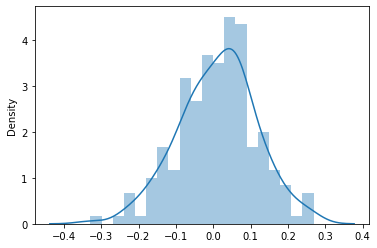

In [ ]:
sns.distplot(skew_var_list_t,bins=20)

In [ ]:
#kurtosis analysis
kurtosis_list_t=[]
for i in santander_test:
      kurt_t=kurtosis(santander_test[i],fisher=True)
      kurtosis_list_t.append(kurt_t)
      print("{}:{}".format(i,kurt_t))

var_0:-0.2649778778070182
var_1:-0.5974143625232244
var_2:-0.3191591263337661
var_3:-0.6131829209372568
var_4:-0.5365421780293183
var_5:-0.6703208431366039
var_6:-0.3851605215766276
var_7:-0.676190795687595
var_8:-0.7909321362881463
var_9:-0.7589041238394652
var_10:-0.507921215245255
var_11:-0.3097224169004815
var_12:-0.3651596027946935
var_13:-0.6641915395578306
var_14:-0.7626153606705328
var_15:-0.574876536156018
var_16:-0.32251093441176293
var_17:-0.4421164409793734
var_18:-0.5914269367384954
var_19:-0.6446024797538197
var_20:-0.8259907967465074
var_21:-0.3430833855394644
var_22:-0.3477933795347248
var_23:-0.5058526001192134
var_24:-0.7324408195360839
var_25:-0.3150664046974163
var_26:-0.2730270579373575
var_27:-0.678057108846994
var_28:-0.37863294852010787
var_29:-0.25671631304171294
var_30:-0.7487807539757845
var_31:-0.2589897025920629
var_32:-0.7168941651499963
var_33:-0.6813133335243942
var_34:-0.6005969863892555
var_35:-0.4077581149681295
var_36:-0.42280470491920763
var_37:-0.6

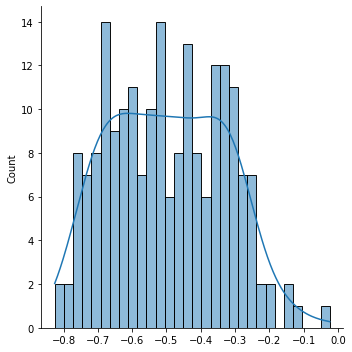

In [ ]:
sns.displot(kurtosis_list_t,kde=True,bins=30)

In [ ]:
#unique values ratio per column
unique_list_t=[]
for i in santander_test:
   unique_t=len(santander_test[i].unique())/len(santander_test)
   unique_list_t.append(unique_t)
   print("{}:{}".format(i,unique_t))

var_0:0.3279
var_1:0.358305
var_2:0.309325
var_3:0.282535
var_4:0.249975
var_5:0.41614
var_6:0.166365
var_7:0.347435
var_8:0.337605
var_9:0.207915
var_10:0.396105
var_11:0.398745
var_12:0.045605
var_13:0.370185
var_14:0.294755
var_15:0.091265
var_16:0.30953
var_17:0.41259
var_18:0.41341
var_19:0.42185
var_20:0.393225
var_21:0.41369
var_22:0.319275
var_23:0.113095
var_24:0.35101
var_25:0.06864
var_26:0.3913
var_27:0.24214
var_28:0.156605
var_29:0.31309
var_30:0.424925
var_31:0.28573
var_32:0.30945
var_33:0.365785
var_34:0.11477
var_35:0.38378
var_36:0.331545
var_37:0.29371
var_38:0.37147
var_39:0.36646
var_40:0.417025
var_41:0.401635
var_42:0.140815
var_43:0.07144
var_44:0.392285
var_45:0.46029
var_46:0.325945
var_47:0.437135
var_48:0.434645
var_49:0.414865
var_50:0.14206
var_51:0.419405
var_52:0.38133
var_53:0.148155
var_54:0.42274
var_55:0.39557
var_56:0.34658
var_57:0.15643
var_58:0.36741
var_59:0.16444
var_60:0.367875
var_61:0.44437
var_62:0.279455
var_63:0.334565
var_64:0.23816
var

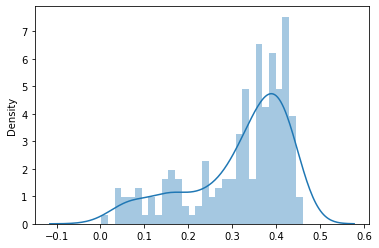

In [ ]:
sns.distplot(unique_list_t,kde=True,bins=30)

Text(0.5, 1.0, 'mean of all 200 variables')

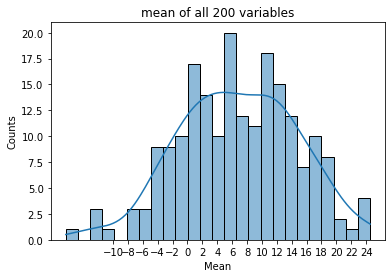

In [ ]:
#means of all variables 
sns.histplot(santander_test.loc[:,'var_0':'var_199'].mean(axis=0),bins=25,kde=True)
plt.xlabel("Mean")
plt.ylabel("Counts")
plt.xticks(np.arange(-10,26,2))
plt.title("mean of all 200 variables")

Text(0.5, 1.0, 'mean of all 200 variables')

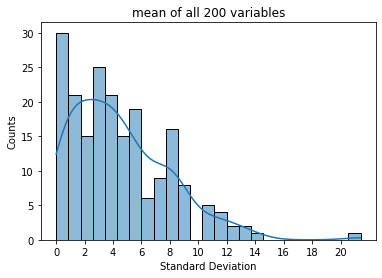

In [ ]:
#std of all variables
sns.histplot(santander_train.loc[:,'var_0':'var_199'].std(axis=0),bins=25,kde=True)
plt.xlabel("Standard Deviation")
plt.ylabel("Counts")
plt.xticks(np.arange(0,22,2))
plt.title("mean of all 200 variables")

In [ ]:
covariance_var_list_t=[]
for i in santander_test:
    covariance_var_t=np.cov(santander_test[i])
    covariance_var_list_t.append(covariance_var_t)
    print("{}:{}".format(i,covariance_var_t))

var_0:9.22164151879435
var_1:16.325714151914468
var_2:6.937368390533036
var_3:4.2136744219214135
var_4:2.612930653065016
var_5:61.92577248308322
var_6:0.7476821062495683
var_7:11.727075705472283
var_8:11.111388448016987
var_9:1.5174925439096982
var_10:30.345348960487872
var_11:35.53880710303016
var_12:0.036126801496938844
var_13:21.424974724180938
var_14:5.086184916800447
var_15:0.16940784398906303
var_16:6.476313765200064
var_17:45.514722290812216
var_18:61.575137868789994
var_19:63.837098529284
var_20:34.62433669967829
var_21:67.23797978133064
var_22:8.088464769238556
var_23:0.2787322127243601
var_24:14.220794176261611
var_25:0.08148398538678693
var_26:35.35317363507793
var_27:2.324908998118384
var_28:0.6171963466966117
var_29:6.81250946926862
var_30:63.546100272012175
var_31:4.64973295312329
var_32:6.701368876568651
var_33:18.711918402567544
var_34:0.29272380609325177
var_35:26.735250565171423
var_36:9.738677698324636
var_37:5.095108419461857
var_38:18.154583333714815
var_39:16.6349

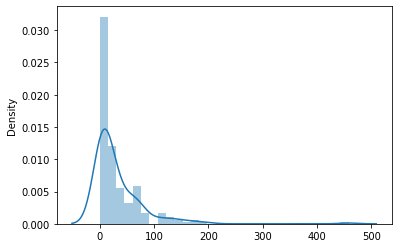

In [ ]:
sns.distplot(covariance_var_list_t,kde=True,bins=30)

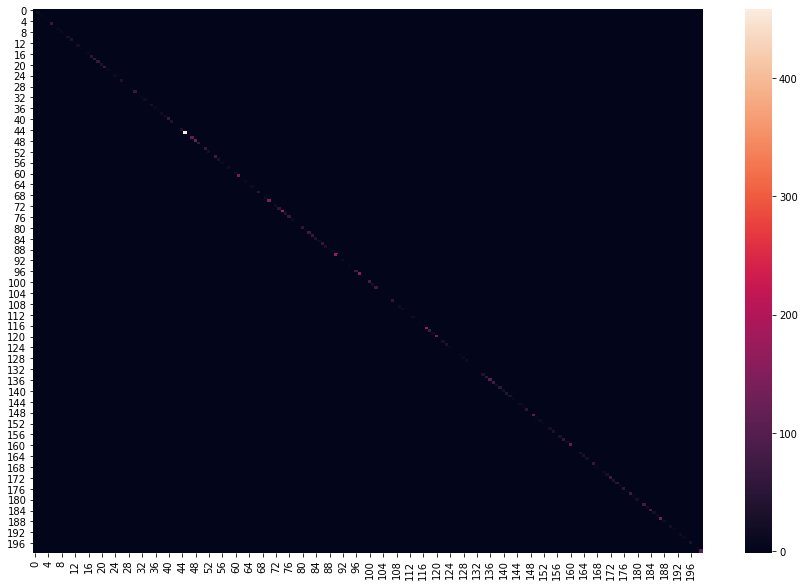

In [ ]:
cov_mat_t=np.cov(santander_test.loc[:,'var_0':'var_199'],rowvar=False) 
plt.figure(figsize=(15,10))
sns.heatmap(cov_mat_t)

In [ ]:
#missing values analysis
santander_test.isnull().sum()

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64

In [ ]:
#min max transform

scaler=min_max.transform(santander_test)
santander_test=pd.DataFrame(scaler,columns=santander_test.columns)

In [ ]:
santander_test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0000

In [ ]:
santander_test

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0.535360,0.897837,0.628717,0.715833,0.548256,0.605894,0.574061,0.578182,0.611866,0.674016,0.474766,0.502258,0.438561,0.224288,0.468781,0.510767,0.408172,0.272646,0.500738,0.600578,0.248951,0.488649,0.347060,0.506248,0.272898,0.723250,0.369578,0.422438,0.540640,0.478163,0.654120,0.395085,0.700669,0.401839,0.436918,0.648217,0.359617,0.361495,0.445720,0.780374,0.367258,0.789947,0.526482,0.614721,0.528090,0.382464,0.546175,0.825746,0.525779,0.506291,0.540970,0.528447,0.475126,0.813736,0.474295,0.621119,0.628672,0.519463,0.217811,0.541627,0.514066,0.595841,0.394696,0.524412,0.557168,0.569421,0.553651,0.628244,0.352166,0.598889,0.618069,0.571190,0.286160,0.691240,0.583821,0.614524,0.516169,0.282829,0.374934,0.897291,0.567416,0.599483,0.857826,0.659442,0.556377,0.519196,0.447038,0.690740,0.733314,0.698963,0.607569,0.580345,0.580056,0.408143,0.191669,0.437848,0.337834,0.650571,0.534360,0.739589,0.465785,0.607151,0.653008,0.423764,0.588344,0.429957,0.511187,0.341971,0.284615,0.354006,0.452239,0.505969,0.616953,0.727890,0.322900,0.447015,0.565736,0.329589,0.491590,0.716841,0.654827,0.464562,0.464881,0.555144,0.363901,0.462238,0.672580,0.663211,0.339046,0.499085,0.551106,0.595882,0.805201,0.730694,0.543017,0.585268,0.317316,0.508499,0.281854,0.326366,0.281695,0.358320,0.673513,0.516394,0.594301,0.465153,0.562317,0.351048,0.545416,0.518613,0.588630,0.518129,0.489165,0.303906,0.864667,0.592801,0.294747,0.528569,0.419397,0.525788,0.203130,0.383380,0.337188,0.359852,0.354554,0.554426,0.296260,0.623377,0.476344,0.327433,0.600754,0.598001,0.623231,0.750340,0.453933,0.513266,0.575857,0.336894,0.401178,0.476357,0.503094,0.554036,0.190180,0.307855,0.792989,0.601959,0.497131,0.342830,0.355245,0.639518,0.366928,0.749230,0.195180,0.473444,0.260824,0.810571,0.570992,0.788006,0.463751,0.447387
1,0.408005,0.641132,0.533050,0.395056,0.355501,0.573148,0.601977,0.594479,0.294934,0.279021,0.491108,0.595236,0.556029,0.302647,0.322132,0.397789,0.368716,0.725805,0.759844,0.262548,0.478758,0.223696,0.531220,0.330933,0.646323,0.404373,0.476199,0.265890,0.540237,0.434109,0.482189,0.518720,0.508464,0.493471,0.236019,0.457651,0.664165,0.270211,0.531100,0.434984,0.848554,0.336283,0.372012,0.578463,0.274558,0.322050,0.613609,0.443207,0.387367,0.419099,0.264250,0.725559,0.628889,0.716899,0.641604,0.614652,0.719960,0.610674,0.431284,0.575749,0.272526,0.396471,0.544442,0.404584,0.443104,0.576588,0.369359,0.603056,0.693032,0.360985,0.359644,0.514060,0.437418,0.501670,0.391688,0.520241,0.509593,0.625038,0.6

**Predictions**

*Logistic Regression*

In [ ]:
y_pred_lr=lr.predict(santander_test)

In [ ]:
y_pred_lr_df=pd.DataFrame(y_pred_lr)

In [ ]:
y_pred_lr_df.value_counts()

0    169282
1     30718
dtype: int64

*Naive Bayes*

In [ ]:
y_pred_mnb=mnb.predict(santander_test)

In [ ]:
y_pred_mnb_df=pd.DataFrame(y_pred_mnb)

In [ ]:
y_pred_mnb_df.value_counts()

0    200000
dtype: int64

*Gaussian Naive Bayes*

In [ ]:
y_pred_gnb=gnb.predict(santander_test)


In [ ]:
y_pred_gnb_df=pd.DataFrame(y_pred_gnb)


In [ ]:
y_pred_gnb_df.value_counts()

0    175630
1     24370
dtype: int64

*Light GBM*

In [ ]:
y_pred_lgbm=lgbm.predict(santander_test)

In [ ]:
y_pred_lgbm_df=pd.DataFrame(y_pred_lgbm)

In [ ]:
y_pred_lgbm_df.value_counts()

0    187206
1     12794
dtype: int64

*XGBOOST*

In [ ]:
y_pred_xgb=xgb_best.predict(santander_test.values)

In [ ]:
y_pred_xgb_df=pd.DataFrame(y_pred_xgb)

In [ ]:
y_pred_xgb_df.value_counts()

0    193052
1      6948
dtype: int64

In [ ]:
y_pred_gnb_df['ID_code']=sant_test['ID_code']

In [ ]:
y_pred_gnb_df['target']=y_pred_gnb_df[0]

In [ ]:
y_pred_gnb_df=y_pred_gnb_df.drop(0,axis=1)

In [ ]:
y_pred_gnb_df.to_csv('/content/sample_submission3.csv',index=False)

In [ ]:
sant_test=pd.read_csv('/content/drive/MyDrive/santander/test (1).csv')